In [ ]:
!pip install rlcard[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.5/265.5 KB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.0 MB/s eta 0:00:00
  Created wheel for rlcard: filename=rlcard-1.1.0-py3-none-any.whl size=322198 sha256=eaacf382b72e9fda87d0d3920ef7cb1951ea0ec8564bbca70b5f71858cb94dce
  Stored in directory: /root/.cache/pip/wheels/1d/a8/66/5a7a7be9d7d0607ec8cabde164f3b44694800f394736ce56a4
Successfully built rlcard


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/CS6284/

0_nfsp_comp1.pth      20000_nfsp_comp1.pth  log.txt
0_nfsp_comp2.pth      20000_nfsp_comp2.pth  model.pth
0_nfsp_comp3.pth      20000_nfsp_comp3.pth  nfsp_comp1.pth
10000_nfsp_comp1.pth  5000_nfsp_comp1.pth   nfsp_comp2.pth
10000_nfsp_comp2.pth  5000_nfsp_comp2.pth   nfsp_comp3.pth
10000_nfsp_comp3.pth  5000_nfsp_comp3.pth   performance.csv
15000_nfsp_comp1.pth  agent1.pth	    rlcard_load_eval.ipynb
15000_nfsp_comp2.pth  agent2.pth	    run_rl.py
15000_nfsp_comp3.pth  agent3.pth


In [ ]:
import rlcard
from rlcard import models
from rlcard.agents import NFSPAgent, RandomAgent
from rlcard.utils import (
    get_device,
    set_seed,
    tournament,
    reorganize,
    Logger,
    plot_curve,
)
import numpy as np

In [ ]:
import torch

In [ ]:
env = rlcard.make(
        'limit-holdem',
        config={
            'allow_step_back': True,
            'seed': 0,
            'game_num_players': 3,
        }
    )
eval_env = rlcard.make(
    'limit-holdem',
)

In [ ]:
# agent1 = torch.load('/content/drive/MyDrive/CS6284/nfsp_comp1.pth')
# agent2 = torch.load('/content/drive/MyDrive/CS6284/nfsp_comp2.pth')
# agent3 = torch.load('/content/drive/MyDrive/CS6284/nfsp_comp3.pth')


agent1 = torch.load('/content/drive/MyDrive/CS6284/nfsp_comp1.pth')
agent2 = torch.load('/content/drive/MyDrive/CS6284/nfsp_comp2.pth')
agent3 = torch.load('/content/drive/MyDrive/CS6284/nfsp_comp3.pth')


In [ ]:
random_agent = RandomAgent(num_actions=4)

In [ ]:
env.set_agents([
  agent1,
  agent2,
  agent3
])

In [ ]:
a = [0 for _ in range(env.num_players)]
for i in range(1000):
  env.reset()
  trajectories, payoffs = env.run(is_training=False)
  for idx in range(env.num_players):
    # print(f"Player {idx}: {env.game.get_state(idx)['my_chips']}")
    a[idx] += payoffs[idx]


In [ ]:
a

[-1583.5, 1744.5, -161.0]

In [ ]:
while not env.is_over():
  env.reset()
  pass

True

In [ ]:
env.reset()
env.get_perfect_information()

{'chips': [2, 0, 1],
 'public_card': None,
 'hand_cards': [['SK', 'ST'], ['S8', 'HJ'], ['D7', 'C4']],
 'current_player': 1,
 'legal_actions': ['call', 'raise', 'fold']}

In [ ]:
env.game.players[0]

In [ ]:
!python3 /content/drive/MyDrive/CS6284/run_rl.py

--> Running on the GPU
INFO - Step 85798, sl-loss: 0.13467060029506683
----------------------------------------
  episode      |  0
  reward       |  [-0.66825, -0.08075, 0.749]
----------------------------------------
INFO - Step 87100, rl-loss: 119.65666198730469
INFO - Copied model parameters to target network.
INFO - Step 86100, rl-loss: 30.090736389160156
INFO - Copied model parameters to target network.
INFO - Step 86364, sl-loss: 0.117606982588768
----------------------------------------
  episode      |  100
  reward       |  [-0.236, 0.23, 0.006]
----------------------------------------
INFO - Step 86100, rl-loss: 7.588644504547119
INFO - Copied model parameters to target network.
INFO - Step 86941, sl-loss: 0.1303752064704895
----------------------------------------
  episode      |  200
  reward       |  [-1.181, 1.07075, 0.11025]
----------------------------------------
INFO - Step 87100, rl-loss: 31.6157283782959
INFO - Copied model parameters to target network.
INFO - Ste

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS6284/performance.csv')
df['reward'] = df['reward'].apply(ast.literal_eval)


In [ ]:
df1 = pd.read_csv('/content/old_performance.csv')
df1['reward'] = df1['reward'].apply(ast.literal_eval)

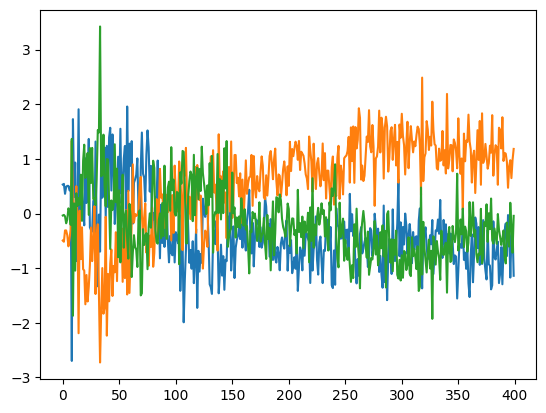

In [ ]:
plt.plot(df1['reward'].to_list() + df['reward'].to_list())

In [ ]:
df['reward']

0       [-0.66825, -0.08075, 0.749]
1             [-0.236, 0.23, 0.006]
2        [-1.181, 1.07075, 0.11025]
3            [-0.631, 1.071, -0.44]
4       [-0.48475, 0.55675, -0.072]
                   ...             
245    [-0.2565, 0.86275, -0.60625]
246     [-1.17225, 0.9755, 0.19675]
247     [-0.41425, 0.648, -0.23375]
248     [-0.26375, 0.98075, -0.717]
249    [-1.1395, 1.18225, -0.04275]
Name: reward, Length: 250, dtype: object

In [ ]:
from pprint import pprint

In [ ]:
for i in range(2):
  trajectories, payoffs = env.run(is_training=False)


In [ ]:
env.reset()
trajectories, payoffs = env.run(is_training=False)
trajectories = reorganize(trajectories, payoffs)

In [ ]:
trajectories[0]

In [ ]:
test = trajectories[0][0][0]['obs']

In [ ]:
test[:13], test[13:26], test[26:39], test[39:52]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
test[52:]

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0.])

In [ ]:
trajectories[0][8][0]['obs'][62: 67]

array([0., 0., 0., 0., 1.])

In [ ]:
for i in range(len(trajectories[0])):
  pprint(trajectories[0][i][0]['obs'][57:62])

array([1., 0., 0., 0., 0.])
array([1., 0., 0., 0., 0.])
array([1., 0., 0., 0., 0.])
array([0., 1., 0., 0., 0.])
array([0., 0., 0., 1., 0.])
array([0., 0., 0., 0., 1.])
array([0., 0., 0., 0., 1.])
array([0., 0., 0., 0., 1.])
array([0., 0., 0., 0., 1.])


In [ ]:
for i in range(len(trajectories[0])):
  pprint(trajectories[0][i][0]['raw_obs']['raise_nums'])


[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
